<a href="https://colab.research.google.com/github/feliphearaujo/poland-used-cars-offers-machine-learning/blob/main/poland_used_cars_offers_random_forest_with_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

B) Random Forest Regression Model with LDA



In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url="https://github.com/feliphearaujo/poland-used-cars-offers-machine-learning/blob/main/dataset/data.csv?raw=true"
df = pd.read_csv(url, sep = ",")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB


In [ ]:
df.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [ ]:
valor_especifico = 'km'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
valor_especifico = 'cm'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
valor_especifico = 'Elektryczny'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
valor_especifico = 'Benzyna'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
valor_especifico = 'Diesel'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
valor_especifico = 'Hybryda'
df = df[~df['year'].str.contains(valor_especifico)]

# Exibindo o DataFrame após a eliminação das linhas
print("\nDataFrame após a eliminação das linhas:")
print(df)


DataFrame após a eliminação das linhas:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual       1 970 cm3 

In [ ]:
opcoes_unicas = df['year'].unique()
print(opcoes_unicas)

contagem_opcoes = df['year'].value_counts()
print(contagem_opcoes)

['1998' '1996' '1995' '2004' '2003' '2000' '2002' '2001' '2008' '2006'
 '2009' '2007' '2015' '2016' '2017' '2018' '2014' '2012' '2010' '2013'
 '2011' '2022' '2005' '2019' '2020' '2021' '2023' '1999' '1997']
2018    6192
2017    5900
2019    5821
2016    5025
2023    4759
2015    4611
2011    4599
2014    4465
2012    4342
2010    4131
2013    4048
2022    4006
2020    3170
2021    2925
2008    2858
2009    2827
2007    2648
2004    2280
2006    2094
2005    1631
2003    1565
1999    1432
1998    1121
2002     893
1997     709
2001     633
1996     562
2000     550
1995     477
Name: year, dtype: int64


In [ ]:
df['year'] = df['year'].astype(float)

In [ ]:
#df = df.drop('year', axis=1)

In [ ]:
opcoes_unicas = df['engine_capacity'].unique()
print(opcoes_unicas)

contagem_opcoes = df['engine_capacity'].value_counts()
print(contagem_opcoes)

['1 970 cm3' '1 995 cm3' '1 598 cm3' '1 910 cm3' '2 492 cm3' '2 387 cm3'
 '1 368 cm3' '1 742 cm3' '1 956 cm3' '1 858 cm3' '2 143 cm3' '1 248 cm3'
 '1 900 cm3' '2 959 cm3' '3 195 cm3' '2 198 cm3' '2 891 cm3' '1 469 cm3'
 '6 000 cm3' '4 300 cm3' '4 735 cm3' '5 935 cm3' '1 896 cm3' '1 595 cm3'
 '1 781 cm3' '1 892 cm3' '1 984 cm3' '2 400 cm3' '2 461 cm3' '2 771 cm3'
 '1 798 cm3' '2 498 cm3' '2 671 cm3' '2 496 cm3' '1 600 cm3' '2 598 cm3'
 '1 968 cm3' '1 498 cm3' '2 967 cm3' '999 cm3' '1 422 cm3' '4 172 cm3'
 '2 393 cm3' '2 800 cm3' '3 699 cm3' '1 800 cm3' '3 123 cm3' '3 197 cm3'
 '2 698 cm3' '4 163 cm3' '3 936 cm3' '5 998 cm3' '2 976 cm3' '2 995 cm3'
 '2 000 cm3' '4 134 cm3' '3 956 cm3' '1 400 cm3' '3 993 cm3' '2 480 cm3'
 'Elektryczny' '1 395 cm3' '3 996 cm3' 'Benzyna' '4 398 cm3' '6 752 cm3'
 '5 950 cm3' '2 494 cm3' '2 793 cm3' '1 991 cm3' '1 895 cm3' '2 990 cm3'
 '1 990 cm3' '1 796 cm3' '2 497 cm3' '1 596 cm3' '2 996 cm3' '1 599 cm3'
 '1 499 cm3' '1 997 cm3' '2 993 cm3' '1 496 cm3' '1 9

In [ ]:
valor_especifico = 'cm3'
df = df[df['engine_capacity'].str.contains(valor_especifico)]

In [ ]:
df['engine_capacity'] = df['engine_capacity'].str.replace(' cm3', '')

# Exibindo o DataFrame com "cm3" removido
print("\nDataFrame com 'cm3' removido:")
print(df)


DataFrame com 'cm3' removido:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual           1 970      Benzy

In [ ]:
df['engine_capacity'] = df['engine_capacity'].str.replace(' ', '')

# Exibindo o DataFrame com " " removido
print("\nDataFrame com ' ' removido:")
print(df)


DataFrame com ' ' removido:
            brand                               model  price_in_pln  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   
...           ...                                 ...           ...   
91518       volvo                         Volvo XC 90      379900.0   
91519       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0   
91520       volvo               Volvo V60 T4 R-Design      159900.0   
91521       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0   
91522       volvo          Volvo XC 40 T3 Inscription      108900.0   

          mileage    gearbox engine_capacity    fuel_type  \
0      133 760 km     manual            1970      Benzyna

In [ ]:
df['engine_capacity'] = df['engine_capacity'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85677 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            85677 non-null  object 
 1   model            85677 non-null  object 
 2   price_in_pln     85677 non-null  float64
 3   mileage          85677 non-null  object 
 4   gearbox          85677 non-null  object 
 5   engine_capacity  85677 non-null  float64
 6   fuel_type        85677 non-null  object 
 7   city             85677 non-null  object 
 8   voivodeship      85677 non-null  object 
 9   year             85677 non-null  float64
dtypes: float64(3), object(7)
memory usage: 7.2+ MB


In [ ]:
df.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1970.0,Benzyna,Łask,Łódzkie,1998.0
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1970.0,Benzyna,Mława,Mazowieckie,1998.0
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1970.0,Benzyna,Chełmża,Kujawsko-pomorskie,1996.0
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1970.0,Benzyna,Jasło,Podkarpackie,1996.0
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1995.0,Benzyna+LPG,Pabianice,Łódzkie,1995.0


In [ ]:

df["gearbox"] = df["gearbox"].astype('category')
df['gearbox'] = df['gearbox'].cat.codes

In [ ]:
opcoes_unicas = df['brand'].unique()
print(opcoes_unicas)

contagem_opcoes = df['brand'].value_counts()
print(contagem_opcoes)

['alfa-romeo' 'aston-martin' 'audi' 'bentley' 'bmw' 'cadillac' 'chevrolet'
 'citroen' 'dacia' 'daewoo' 'daihatsu' 'dodge' 'ferrari' 'fiat' 'ford'
 'honda' 'hyundai' 'infiniti' 'isuzu' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'lancia' 'land-rover' 'maserati' 'mazda' 'mercedes-benz' 'mini'
 'mitsubishi' 'nissan' 'opel' 'peugeot' 'porsche' 'renault' 'rover' 'saab'
 'seat' 'skoda' 'smart' 'toyota' 'volkswagen' 'volvo']
volkswagen       10414
opel              9807
bmw               6602
mercedes-benz     6289
peugeot           6156
ford              5925
toyota            5763
volvo             5041
renault           4841
hyundai           3475
nissan            2662
kia               2479
honda             2034
seat              2024
citroen           1251
land-rover        1012
skoda              985
mitsubishi         966
jeep               863
mini               683
alfa-romeo         652
porsche            645
mazda              558
fiat               544
jaguar             516
audi      

In [ ]:
df["brand"] = df["brand"].astype('category')
df['brand'] = df['brand'].cat.codes

In [ ]:
opcoes_unicas = df['model'].unique()
print(opcoes_unicas)

contagem_opcoes = df['model'].value_counts()
print(contagem_opcoes)

['Alfa Romeo Spider 2.0-16 TSpark' 'Alfa Romeo GTV 2.0 16v TSpark'
 'Alfa Romeo 164 2.0 TSpark Super' ... 'Volvo S90 B4 B Momentum Pro'
 'Volvo XC 40 Recharge Twin AWD Plus' 'Volvo XC 40 T3 Inscription']
Opel Astra                                             1017
Volkswagen Golf                                         734
Toyota Corolla                                          612
Ford Focus                                              515
Volkswagen Passat                                       512
                                                       ... 
Opel Grandland X 1.5 CDTI Elite S&S                       1
Opel Zafira Tourer 1.4 Turbo drive                        1
Opel Insignia 1.6 CDTI ecoFLEX Start/Stop Selection       1
Dacia Sandero 1.4 Ambiance                                1
Volvo XC 40 T3 Inscription                                1
Name: model, Length: 18021, dtype: int64


In [ ]:
df["model"] = df["model"].astype('category')
df['model'] = df['model'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85677 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            85677 non-null  int8   
 1   model            85677 non-null  int16  
 2   price_in_pln     85677 non-null  float64
 3   mileage          85677 non-null  object 
 4   gearbox          85677 non-null  int8   
 5   engine_capacity  85677 non-null  float64
 6   fuel_type        85677 non-null  object 
 7   city             85677 non-null  object 
 8   voivodeship      85677 non-null  object 
 9   year             85677 non-null  float64
dtypes: float64(3), int16(1), int8(2), object(4)
memory usage: 5.6+ MB


In [ ]:
opcoes_unicas = df['mileage'].unique()
print(opcoes_unicas)

contagem_opcoes = df['mileage'].value_counts()
print(contagem_opcoes)

['133 760 km' '227 000 km' '239 000 km' ... '137 904 km' '1 024 km'
 '8 847 km']
5 km          1802
1 km          1597
10 km          822
180 000 km     533
190 000 km     501
              ... 
77 350 km        1
59 785 km        1
39 070 km        1
64 895 km        1
104 692 km       1
Name: mileage, Length: 14035, dtype: int64


In [ ]:
valor_especifico = 'km'
df = df[df['mileage'].str.contains(valor_especifico)]

In [ ]:
df['mileage'] = df['mileage'].str.replace(' km', '')

# Exibindo o DataFrame com "cm3" removido
print("\nDataFrame com 'cm3' removido:")
print(df)


DataFrame com 'cm3' removido:
       brand  model  price_in_pln  mileage  gearbox  engine_capacity  \
0          0    124       14700.0  133 760        1           1970.0   
1          0     60       14000.0  133 760        1           1970.0   
2          0     43        4500.0  227 000        1           1970.0   
3          0    123       17100.0  227 000        1           1970.0   
4          0     13        3900.0  239 000        1           1995.0   
...      ...    ...           ...      ...      ...              ...   
91518     42  17946      379900.0    1 024        0           1969.0   
91519     42  18009      246000.0    1 024        0           1969.0   
91520     42  17549      159900.0    8 847        0           1969.0   
91521     42  17746      146000.0    8 847        0           1969.0   
91522     42  17733      108900.0   34 000        0           1969.0   

         fuel_type                 city         voivodeship    year  
0          Benzyna                

In [ ]:
df['mileage'] = df['mileage'].str.replace(' ', '')

# Exibindo o DataFrame com " " removido
print("\nDataFrame com ' ' removido:")
print(df)


DataFrame com ' ' removido:
       brand  model  price_in_pln mileage  gearbox  engine_capacity  \
0          0    124       14700.0  133760        1           1970.0   
1          0     60       14000.0  133760        1           1970.0   
2          0     43        4500.0  227000        1           1970.0   
3          0    123       17100.0  227000        1           1970.0   
4          0     13        3900.0  239000        1           1995.0   
...      ...    ...           ...     ...      ...              ...   
91518     42  17946      379900.0    1024        0           1969.0   
91519     42  18009      246000.0    1024        0           1969.0   
91520     42  17549      159900.0    8847        0           1969.0   
91521     42  17746      146000.0    8847        0           1969.0   
91522     42  17733      108900.0   34000        0           1969.0   

         fuel_type                 city         voivodeship    year  
0          Benzyna                 Łask         

In [ ]:
df['mileage'] = df['mileage'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85677 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            85677 non-null  int8   
 1   model            85677 non-null  int16  
 2   price_in_pln     85677 non-null  float64
 3   mileage          85677 non-null  float64
 4   gearbox          85677 non-null  int8   
 5   engine_capacity  85677 non-null  float64
 6   fuel_type        85677 non-null  object 
 7   city             85677 non-null  object 
 8   voivodeship      85677 non-null  object 
 9   year             85677 non-null  float64
dtypes: float64(4), int16(1), int8(2), object(3)
memory usage: 5.6+ MB


In [ ]:
opcoes_unicas = df['fuel_type'].unique()
print(opcoes_unicas)

contagem_opcoes = df['fuel_type'].value_counts()
print(contagem_opcoes)

['Benzyna' 'Benzyna+LPG' 'Diesel' 'Hybryda' 'Benzyna+CNG' 'Elektryczny']
Benzyna        43077
Diesel         35603
Benzyna+LPG     4066
Hybryda         2893
Benzyna+CNG       24
Elektryczny       14
Name: fuel_type, dtype: int64


In [ ]:
coluna_fuel_type = df['fuel_type']

# Aplicando o get_dummies na coluna 'frutas'
dummies_fuel_type = pd.get_dummies(coluna_fuel_type, prefix='fuel_type')

# Concatenando as colunas binárias ao DataFrame original
df = pd.concat([df, dummies_fuel_type], axis=1)

# Exibindo o resultado
print(df)

       brand  model  price_in_pln   mileage  gearbox  engine_capacity  \
0          0    124       14700.0  133760.0        1           1970.0   
1          0     60       14000.0  133760.0        1           1970.0   
2          0     43        4500.0  227000.0        1           1970.0   
3          0    123       17100.0  227000.0        1           1970.0   
4          0     13        3900.0  239000.0        1           1995.0   
...      ...    ...           ...       ...      ...              ...   
91518     42  17946      379900.0    1024.0        0           1969.0   
91519     42  18009      246000.0    1024.0        0           1969.0   
91520     42  17549      159900.0    8847.0        0           1969.0   
91521     42  17746      146000.0    8847.0        0           1969.0   
91522     42  17733      108900.0   34000.0        0           1969.0   

         fuel_type                 city         voivodeship    year  \
0          Benzyna                 Łask             

In [ ]:
df.info()

In [ ]:
df = df.drop('fuel_type', axis=1)

In [ ]:
opcoes_unicas = df['city'].unique()
print(opcoes_unicas)

contagem_opcoes = df['city'].value_counts()
print(contagem_opcoes)

['Łask' 'Mława' 'Chełmża' ... 'Wicie' 'Stare Pole' 'Załuski']
Warszawa        6376
Kraków          2262
Wrocław         2037
Poznań          1940
Łódź            1870
                ... 
Krzeszyce          1
Stary Adamów       1
Latkowo            1
Dworzysko          1
Załuski            1
Name: city, Length: 4353, dtype: int64


In [ ]:
df["city"] = df["city"].astype('category')
df['city'] = df['city'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85677 entries, 0 to 91522
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  85677 non-null  int8   
 1   model                  85677 non-null  int16  
 2   price_in_pln           85677 non-null  float64
 3   mileage                85677 non-null  float64
 4   gearbox                85677 non-null  int8   
 5   engine_capacity        85677 non-null  float64
 6   city                   85677 non-null  int16  
 7   voivodeship            85677 non-null  object 
 8   year                   85677 non-null  float64
 9   fuel_type_Benzyna      85677 non-null  uint8  
 10  fuel_type_Benzyna+CNG  85677 non-null  uint8  
 11  fuel_type_Benzyna+LPG  85677 non-null  uint8  
 12  fuel_type_Diesel       85677 non-null  uint8  
 13  fuel_type_Elektryczny  85677 non-null  uint8  
 14  fuel_type_Hybryda      85677 non-null  uint8  
dtypes:

In [ ]:
opcoes_unicas = df['voivodeship'].unique()
print(opcoes_unicas)

contagem_opcoes = df['voivodeship'].value_counts()
print(contagem_opcoes)

['Łódzkie' 'Mazowieckie' 'Kujawsko-pomorskie' 'Podkarpackie'
 'Wielkopolskie' 'Pomorskie' 'Małopolskie' 'Podlaskie' 'Śląskie'
 'Dolnośląskie' 'Lubelskie' 'Świętokrzyskie' 'Zachodniopomorskie'
 'Lubuskie' 'Opolskie' 'Warmińsko-mazurskie' 'Praga'
 'Moravian-Silesian Region' 'Brandenburg' 'Rheinland-Pfalz' 'Anglia'
 'Berlin' 'Hessen' 'Jihomoravský kraj' 'Nordrhein-Westfalen']
Mazowieckie                 16863
Wielkopolskie               11660
Śląskie                     10547
Małopolskie                  7346
Dolnośląskie                 6544
Pomorskie                    5152
Łódzkie                      5129
Kujawsko-pomorskie           3664
Zachodniopomorskie           3112
Lubelskie                    3104
Podkarpackie                 2750
Świętokrzyskie               2561
Lubuskie                     2287
Warmińsko-mazurskie          1867
Podlaskie                    1646
Opolskie                     1400
Moravian-Silesian Region       29
Berlin                          4
Nordrhein-We

In [ ]:
coluna_fuel_type = df['voivodeship']

# Aplicando o get_dummies na coluna 'frutas'
dummies_fuel_type = pd.get_dummies(coluna_fuel_type, prefix='voivodeship')

# Concatenando as colunas binárias ao DataFrame original
df = pd.concat([df, dummies_fuel_type], axis=1)

# Exibindo o resultado
print(df)

       brand  model  price_in_pln   mileage  gearbox  engine_capacity  city  \
0          0    124       14700.0  133760.0        1           1970.0  4147   
1          0     60       14000.0  133760.0        1           1970.0  2144   
2          0     43        4500.0  227000.0        1           1970.0   426   
3          0    123       17100.0  227000.0        1           1970.0  1178   
4          0     13        3900.0  239000.0        1           1995.0  2458   
...      ...    ...           ...       ...      ...              ...   ...   
91518     42  17946      379900.0    1024.0        0           1969.0  3404   
91519     42  18009      246000.0    1024.0        0           1969.0  3071   
91520     42  17549      159900.0    8847.0        0           1969.0  2785   
91521     42  17746      146000.0    8847.0        0           1969.0  4327   
91522     42  17733      108900.0   34000.0        0           1969.0  2424   

              voivodeship    year  fuel_type_Benzyn

In [ ]:
df = df.drop('voivodeship', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85677 entries, 0 to 91522
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   brand                                 85677 non-null  int8   
 1   model                                 85677 non-null  int16  
 2   price_in_pln                          85677 non-null  float64
 3   mileage                               85677 non-null  float64
 4   gearbox                               85677 non-null  int8   
 5   engine_capacity                       85677 non-null  float64
 6   city                                  85677 non-null  int16  
 7   year                                  85677 non-null  float64
 8   fuel_type_Benzyna                     85677 non-null  uint8  
 9   fuel_type_Benzyna+CNG                 85677 non-null  uint8  
 10  fuel_type_Benzyna+LPG                 85677 non-null  uint8  
 11  fuel_type_Diese

In [ ]:

correlation = df.corr()['price_in_pln']

# Exibindo o resultado
print(correlation)

brand                                  -0.168219
model                                  -0.155727
price_in_pln                            1.000000
mileage                                -0.418942
gearbox                                -0.377436
engine_capacity                         0.237754
city                                    0.010470
year                                    0.457222
fuel_type_Benzyna                       0.034127
fuel_type_Benzyna+CNG                  -0.004932
fuel_type_Benzyna+LPG                  -0.099369
fuel_type_Diesel                       -0.031182
fuel_type_Elektryczny                   0.014121
fuel_type_Hybryda                       0.107035
voivodeship_Anglia                      0.000105
voivodeship_Berlin                     -0.001288
voivodeship_Brandenburg                 0.002864
voivodeship_Dolnośląskie               -0.004465
voivodeship_Hessen                      0.001927
voivodeship_Jihomoravský kraj           0.001587
voivodeship_Kujawsko

In [ ]:
def eliminar_outlier(df, colname):


        z_mean = df[colname].mean()  #media
        z_std  = df[colname].std()   #desvio padrao

        z_corte_min = z_mean - 2.5 * z_std
        z_corte_max = z_mean + 2.5 * z_std

        lista_outlier =  []
        for i in range(len(df)):
            if ((df.iloc[i][colname] < z_corte_min) or (df.iloc[i][colname] > z_corte_max)):
                 lista_outlier.append(i)

        df = df.drop(df.index[lista_outlier])

        return df

In [ ]:
#for i in df.columns:
  #df = eliminar_outlier(df, i)

In [ ]:
df.info()

In [ ]:
df_pronto = df

In [ ]:
############## Cria as variáveis independentes e dependente

### Separar dados de treinamento e dados de teste.
X = df[df.columns] #slice no dataframe e retorna dataframe
X  = X.drop(['price_in_pln'], axis=1) #remove a variável dependente do X
y = df[['price_in_pln']]

In [ ]:
from sklearn.model_selection import train_test_split

#divide o banco de dados em treinamento e teste. random_state é somente para gerar o mesmo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68541 entries, 59183 to 72625
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   brand                                 68541 non-null  int8   
 1   model                                 68541 non-null  int16  
 2   mileage                               68541 non-null  float64
 3   gearbox                               68541 non-null  int8   
 4   engine_capacity                       68541 non-null  float64
 5   city                                  68541 non-null  int16  
 6   year                                  68541 non-null  float64
 7   fuel_type_Benzyna                     68541 non-null  uint8  
 8   fuel_type_Benzyna+CNG                 68541 non-null  uint8  
 9   fuel_type_Benzyna+LPG                 68541 non-null  uint8  
 10  fuel_type_Diesel                      68541 non-null  uint8  
 11  fuel_type_E

In [ ]:
#LDA
#https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
#https://www.kaggle.com/code/hbao12/machine-learning-linear-discriminant-analysis/notebook

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=X_train.shape[1])  #n_components cannot be larger than min(n_features, n_classes - 1).

model_lda = lda.fit(X_train, np.array(y_train).ravel())

explainedVariance = model_lda.explained_variance_ratio_*100
print(explainedVariance)

[34.32490678  9.06706945  4.15031333  4.10603714  3.19469509  3.02189829
  2.92950556  2.37246228  2.14996875  2.05822157  1.86341954  1.82874115
  1.79565406  1.73403817  1.72534424  1.69250455  1.6685224   1.60587397
  1.57667018  1.53334243  1.48312265  1.43001836  1.38443493  1.33626515
  1.2852722   1.25992948  1.2002982   1.0991341   1.05968634  1.02788613
  0.90683439  0.80932841  0.58233671  0.43105307  0.15368805  0.15152291]


In [ ]:
cumsum= np.cumsum(model_lda.explained_variance_ratio_)
cumsum

array([0.34324907, 0.43391976, 0.4754229 , 0.51648327, 0.54843022,
       0.5786492 , 0.60794426, 0.63166888, 0.65316857, 0.67375078,
       0.69238498, 0.71067239, 0.72862893, 0.74596931, 0.76322275,
       0.7801478 , 0.79683302, 0.81289176, 0.82865846, 0.84399189,
       0.85882312, 0.8731233 , 0.88696765, 0.9003303 , 0.91318302,
       0.92578232, 0.9377853 , 0.94877664, 0.9593735 , 0.96965236,
       0.97872071, 0.98681399, 0.99263736, 0.99694789, 0.99848477,
       1.        ])

In [ ]:
d = np.argmax(cumsum >= 0.95) + 1
d

29

[0.34324907 0.43391976 0.4754229  0.51648327 0.54843022 0.5786492
 0.60794426 0.63166888 0.65316857 0.67375078 0.69238498 0.71067239
 0.72862893 0.74596931 0.76322275 0.7801478  0.79683302 0.81289176
 0.82865846 0.84399189 0.85882312 0.8731233  0.88696765 0.9003303
 0.91318302 0.92578232 0.9377853  0.94877664 0.9593735  0.96965236
 0.97872071 0.98681399 0.99263736 0.99694789 0.99848477 1.        ]


Text(0, 0.5, 'cumulative explained variance')

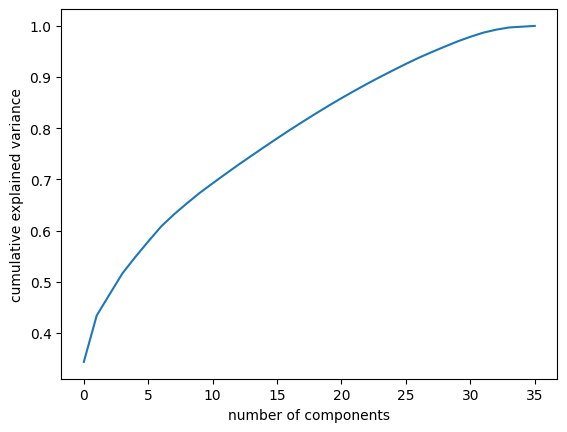

In [ ]:
print(lda.explained_variance_ratio_.cumsum())

plt.plot(lda.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
sm = 0
no_components = 0
for k in range(0, explainedVariance.shape[0]-1):
    sm = sm+explainedVariance[k]
    no_components= no_components+1
    print('Numero de Componentes: ', no_components, ' Variância acumulada: ', sm)

Numero de Componentes:  1  Variância acumulada:  34.32490677573482
Numero de Componentes:  2  Variância acumulada:  43.391976230294276
Numero de Componentes:  3  Variância acumulada:  47.54228955711074
Numero de Componentes:  4  Variância acumulada:  51.64832670009991
Numero de Componentes:  5  Variância acumulada:  54.84302178589057
Numero de Componentes:  6  Variância acumulada:  57.864920074377544
Numero de Componentes:  7  Variância acumulada:  60.794425632081925
Numero de Componentes:  8  Variância acumulada:  63.16688791296018
Numero de Componentes:  9  Variância acumulada:  65.316856663144
Numero de Componentes:  10  Variância acumulada:  67.37507823155342
Numero de Componentes:  11  Variância acumulada:  69.23849777202729
Numero de Componentes:  12  Variância acumulada:  71.06723891963672
Numero de Componentes:  13  Variância acumulada:  72.86289298068722
Numero de Componentes:  14  Variância acumulada:  74.59693114978498
Numero de Componentes:  15  Variância acumulada:  76.322

In [ ]:
explainedVariance.shape

(36,)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=d)

model_lda = lda.fit(X_train, np.array(y_train).ravel())

X_train_reduced = model_lda.transform(X_train)

X_test_reduced = model_lda.transform(X_test)

In [ ]:
#calcular a taxa de variancia explicada
var_ratio = lda.explained_variance_ratio_
print(var_ratio)

[0.34324907 0.09067069 0.04150313 0.04106037 0.03194695 0.03021898
 0.02929506 0.02372462 0.02149969 0.02058222 0.0186342  0.01828741
 0.01795654 0.01734038 0.01725344 0.01692505 0.01668522 0.01605874
 0.0157667  0.01533342 0.01483123 0.01430018 0.01384435 0.01336265
 0.01285272 0.01259929 0.01200298 0.01099134 0.01059686]


In [ ]:
#biblioteca para gerar o modelo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

def rf_param_selection(features, labels, kfolds):

    N_estimators  = [10, 100, 500, 1000]        #nr. de arvores na floresta
    Max_depths    = [15, 30,  50,  100 ]   #profundidade das arvores

    param_grid = {'n_estimators': N_estimators, 'max_depth' : Max_depths}


    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfolds)
    grid_search.fit(features, labels)
    best_params = grid_search.best_params_

    return best_params

In [ ]:
best_params = rf_param_selection(X_train_reduced, np.array(y_train).ravel(), 5)

In [ ]:
### criar o modelo Radom Forest
from sklearn.ensemble import RandomForestRegressor

#model_forest = RandomForestRegressor(random_state = 0)
model_forest = RandomForestRegressor(n_estimators = 1000, max_depth = 15, random_state = 0)
model_forest.fit(X_train_reduced, np.array(y_train).ravel())

RandomForestRegressor(max_depth=15, n_estimators=1000, random_state=0)

In [ ]:
{'max_depth': 15, 'n_estimators': 1000}

In [ ]:
y_pred_train = model_forest.predict(X_train_reduced)

In [ ]:
y_pred_test = model_forest.predict(X_test_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

score = model_forest.score(X_train_reduced, y_train)
print("R2 do Treinamento:", score)

#y_train = scaleY.inverse_transform(y_train.reshape(-1,1))            #convert 1d array to 2d array
#y_pred_train = scaleY.inverse_transform(y_pred_train.reshape(-1,1))  #convert 1d array to 2d array

print("RMSE do Trainamento:", np.sqrt(mean_squared_error(y_pred_train, y_train)))

R2 do Treinamento: 0.8386846819459359
RMSE do Trainamento: 40065.30201024773


In [ ]:
score = model_forest.score(X_test_reduced, y_test)
print("R2 do Teste  :", score)

#y_test = scaleY.inverse_transform(y_test.reshape(-1,1))
#y_pred_test = scaleY.inverse_transform(y_pred_test.reshape(-1,1))

print("RMSE do Teste:", np.sqrt(mean_squared_error(y_pred_test, y_test)))

R2 do Teste  : 0.5894655441716209
RMSE do Teste: 65697.61529740806
